In [43]:
# Step 1: Install the Google Gemini AI SDK
!pip install -q google-generativeai

In [ ]:
# API KEY
import os
os.environ["GOOGLE_API_KEY"] = "ENTER_YOUR_API_KEY"

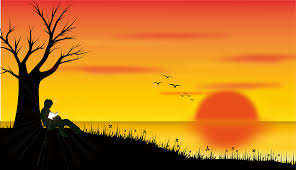

In [46]:
# displaying image
from PIL import Image
from io import BytesIO
import base64

image = Image.open("/content/img1.jpeg")
image

# Multi Model Input (image, 'prompt')
## Generating a Story About The Image

In [47]:
# multi model input
# generating a story about the image

from google import genai

client = genai.Client()

image_1 = Image.open("/content/img1.jpeg")
response_1 = client.models.generate_content(
    model="gemini-2.5-flash",
    contents=[image_1, "Write an story about the image in 100 words"]
)

print(response_1.text)

As the fiery sun dipped below the horizon, painting the sky in breathtaking hues of orange and gold, a lone figure found solace by the water's edge. Nestled beneath the gnarled branches of a solitary tree, they held a glowing book, its pages illuminated by an unseen light. The gentle lapping of waves provided a serene soundtrack, occasionally punctuated by the distant cries of birds heading home. This quiet moment was a precious escape, a time for reflection as day surrendered to night, and thoughts flowed freely under the vast, colourful sky, connecting the soul to the tranquil beauty of the world.


# Image Generation

In [48]:
"""
1. config: generate_content
2. Response Modality: Response modality means the type of output (like text, image, audio, video, or code) the model generates.
It tells the system in what format the response should be produced, and by default, Gemini’s response modality is text.
"""
from google.genai import types

response_2 = client.models.generate_content(
    model="gemini-2.0-flash-preview-image-generation",
    contents=["Make an image of a BMW car drifting on a race track"],
    config=types.GenerateContentConfig(
      response_modalities=['TEXT', 'IMAGE'])
)

In [49]:
response_2

GenerateContentResponse(
  automatic_function_calling_history=[],
  candidates=[
    Candidate(
      content=Content(
        parts=[
          Part(
            text="""I will generate an image of a sleek, modern BMW sports car powerfully drifting around a sharp turn on a professional race track. The car will be angled dramatically, with smoke billowing from its tires, indicating the intense friction and speed. The background will show blurred elements of the racetrack, including colorful barriers and possibly some grandstands, suggesting a competitive racing environment under bright daylight.
"""
          ),
          Part(
            inline_data=Blob(
              data=<... Max depth ...>,
              mime_type=<... Max depth ...>
            )
          ),
        ],
        role='model'
      ),
      finish_reason=<FinishReason.STOP: 'STOP'>,
      index=0
    ),
  ],
  model_version='gemini-2.0-flash-preview-image-generation',
  response_id='ma7kaL6vLaTyjrEP563j8AU',
  sdk

In [50]:
# printing text
response_2.candidates[0].content.parts[0].text

'I will generate an image of a sleek, modern BMW sports car powerfully drifting around a sharp turn on a professional race track. The car will be angled dramatically, with smoke billowing from its tires, indicating the intense friction and speed. The background will show blurred elements of the racetrack, including colorful barriers and possibly some grandstands, suggesting a competitive racing environment under bright daylight.\n'

In [51]:
# storing binary image in data_1 variable
data_1 = response_2.candidates[0].content.parts[1].inline_data.data

In [52]:
# Writes the image data from 'data' into a new file named "bmw.png"
with open("bmw.png", 'wb') as f:
  f.write(data_1)

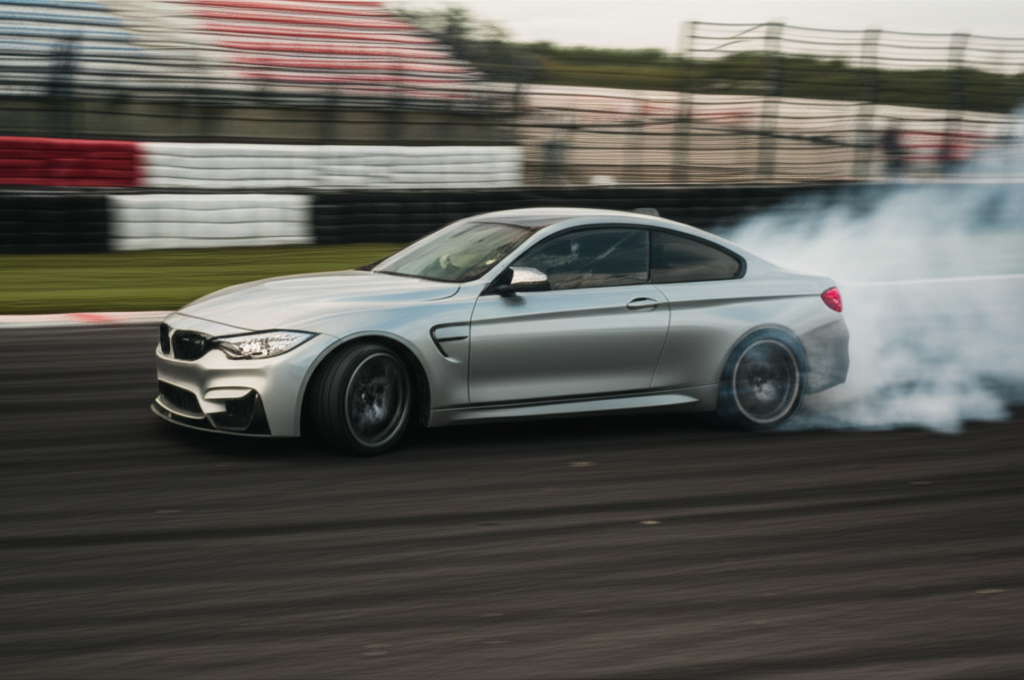

In [53]:
# displaying generated image 'bmw.png'
from IPython.display import display
image_2= Image.open('/content/bmw.png')
display(image_2)

# Image Editing

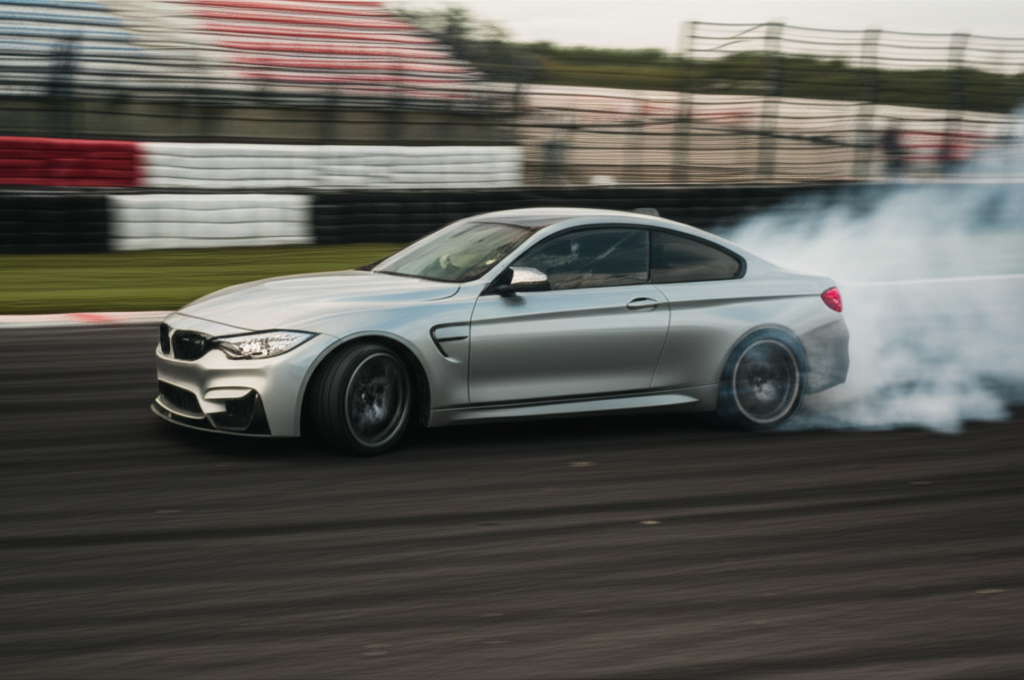

In [56]:
# displaying image
import PIL.Image
image_3 = PIL.Image.open("/content/bmw.png")
image_3

In [57]:
"""
1. image edit
2. input: image + text
3. output: edited image
"""

# initialize the GenAI Client
client = genai.Client()

# Generate content using the Gemini image generation previous model
response_3 = client.models.generate_content(
    model="gemini-2.0-flash-preview-image-generation",
    contents=[image_3, "Edit the BMW image to show the BMW racing alongside other supercars, with a cheering crowd in the background"],
    config=types.GenerateContentConfig(
      response_modalities=['TEXT', 'IMAGE'])
)

In [58]:
# storing binary image in data_2 variable
data_2 = response_3.candidates[0].content.parts[0].inline_data.data

In [59]:
# Writes the image data from 'data' into a new file named "bmw_edited.png"
with open("bmw_edited.png", 'wb') as f:
  f.write(data_2)

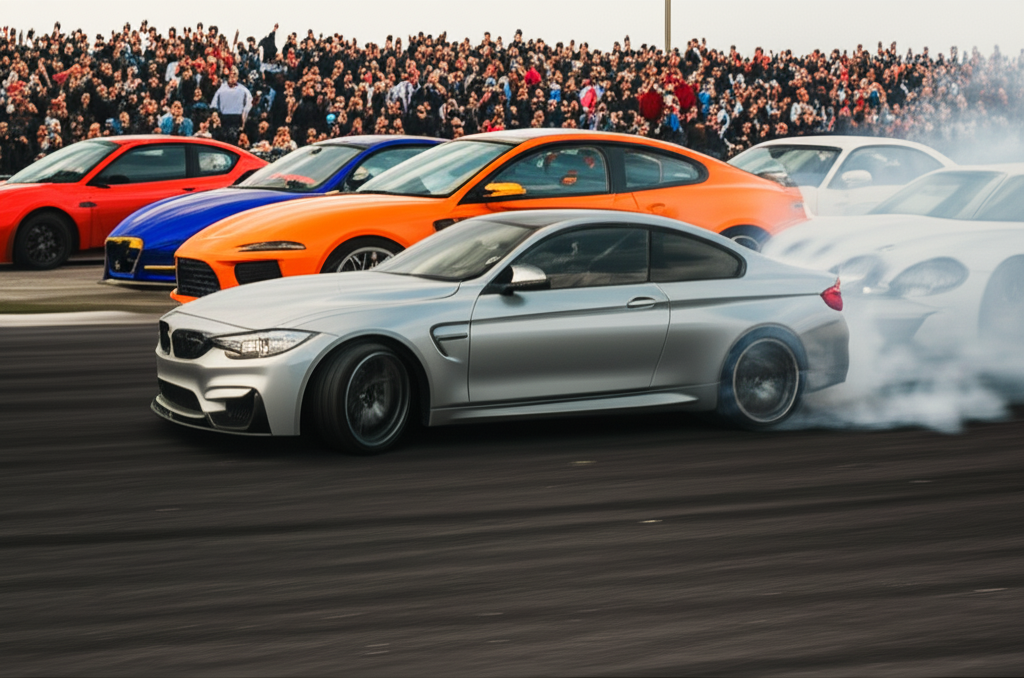

In [61]:
# displaying generated image 'bmw_edited.png'
from IPython.display import display
image_4 = Image.open('/content/bmw_edited.png')
display(image_4)

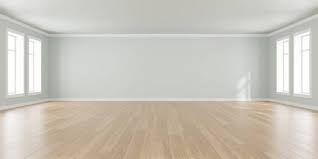

In [121]:
# displaying image
image_5 = PIL.Image.open('/content/room.jpeg')
image_5

In [122]:
# now edit another image
client = genai.Client()
text_input = """Edit this room image to add a sofa design that best suits the room, and
place a few painting frames on the background wall that match the room’s style and decor"""

response_4 = client.models.generate_content(
    model="gemini-2.0-flash-preview-image-generation",
    contents=[image_5, text_input],
    config=types.GenerateContentConfig(
      response_modalities=['TEXT', 'IMAGE'])
)

In [123]:
# storing binary image in data_3 variable
data_3 = response_4.candidates[0].content.parts[0].inline_data.data

In [124]:
# Writes the image data from 'data' into a new file named "room_edited.png"
with open("room_edited.png", 'wb') as f:
  f.write(data_3)

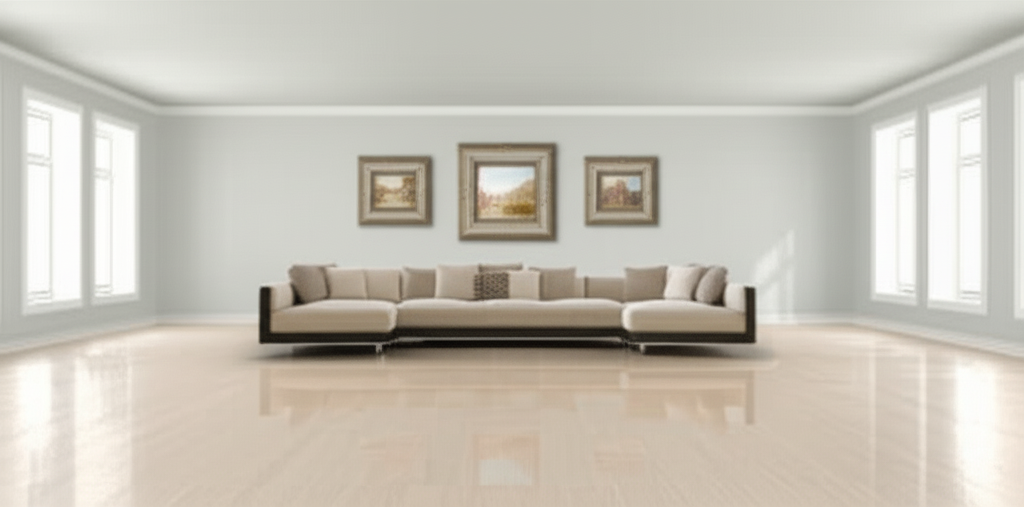

In [125]:
# displaying generated image 'room_edited.png'
from IPython.display import display
image_6 = Image.open('/content/room_edited.png')
display(image_6)